# Notebook 12
# Sunint Bindra

In [1]:
# Importing standard libraries
import numpy as np
from qiskit import QuantumCircuit, execute, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import random_unitary 
print('Libraries imported successfully!')

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Libraries imported successfully!


<a id="part1"></a>
# Superdense Coding Implementation

# Phase 0 - Sharing
We have 2 users (lets call them Alice and Bob). They prepare an entangled state of two qubits, and they will then share the two qubits. This phase happens before the protocol actually begins. Remember that **entanglement is the infrastructure for superdense coding** - it needs to be in place before the protocol can be used. In this step Alice and Bob are setting up this infrastructure.

<a id="part1a"></a>
## Step 1: Alice and Bob entangled two qubits

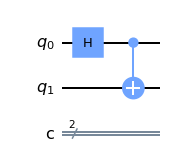

In [10]:
# Step 1: Two users (Alice aand Bob) entangle two qubits
qc_sdc = QuantumCircuit(2,2)
qc_sdc.h(0)
qc_sdc.cx(0,1)
qc_sdc.draw()


## Step 2 - Alice and Bob decide on a decision scheme
*Conventional decision scheme for Bell States is used 

## Step 3 - Alice and Bob share the two entangled qubits

<a id="part1c"></a>
## Step 4 - Alice applies gates to her qubit to send message

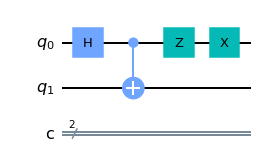

In [11]:
# Alex applies gate to qubit 
qc_sdc.z(0)
qc_sdc.x(0)
qc_sdc.draw()

<a id="part1d"></a>
## Step 5 - Alice sends Bob her qubit

<a id="part1e"></a>
## Step 6 - Bob makes Bell measurements on the two qubits and deciphers Alice's message

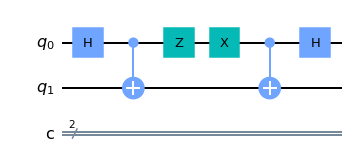

In [12]:
# Bell measurement
qc_sdc.cx(0,1)
qc_sdc.h(0)
qc_sdc.draw()

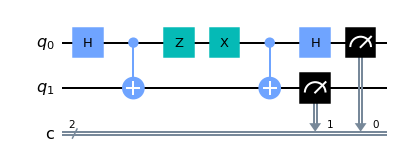

In [13]:
# Adding measurements to circuit 
qc_sdc.measure([0,1],[0,1])
qc_sdc.draw()

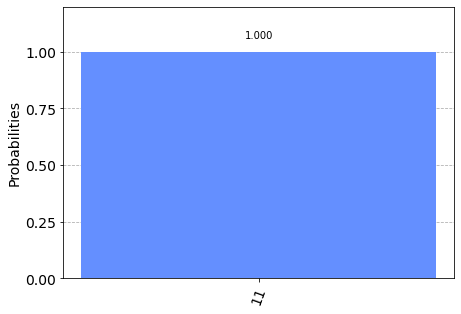

In [14]:
# Simulating on QASM simulator and plotting histogram 
backend = Aer.get_backend('qasm_simulator')
job = execute(qc_sdc, backend, shots=1024)
result = job.result()

counts = result.get_counts()
plot_histogram(counts)


## Running superdense coding circuit on quantum computer

In [15]:
from qiskit.providers.ibmq import least_busy
shots = 256

# Load local account information
IBMQ.load_account()
# Get least busy backend
provider = IBMQ.get_provider(hub='ibm-q')
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 
                                       and not x.configuration().simulator 
                                       and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_lima


In [17]:
# Run circuit
job = execute(qc_sdc, backend=backend, shots=shots)

In [18]:
# Monitoring status of job
from qiskit.tools.monitor import job_monitor
job_monitor(job)


Job Status: job has successfully run


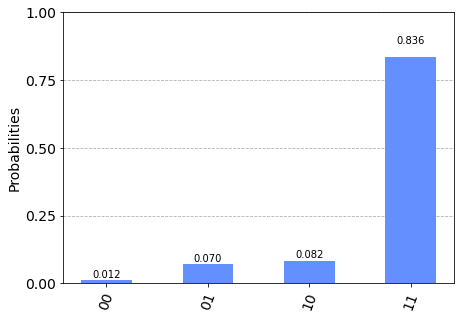

In [19]:
# Plotting histogram
result = job.result()
plot_histogram(result.get_counts())


In [21]:
# Find accuracy of measuremeents 
correct_results = result.get_counts()['11']
accuracy = (correct_results/shots)*100
print("Accuracy = %.2f%%" % accuracy)


Accuracy = 83.59%
